# Module 4.3 — Position Sizing as a Survival Lever (Not Optimization)
### Purpose of this Project

To isolate position sizing as a *pure survival variable*.

This project deliberately does NOT:

- optimize returns
- search for an “optimal” fraction
- compare strategies

It answers only one question:

>Given the same edge, how does risk per bet change the probability of staying alive?

---
### Core Setup (Held Constant)

All traders share:

- Same win probability p
- Same payoff structure (1R win / −1R loss)
- Same starting capital
- Same number of trades
- Same ruin definition

Only one variable changes:

> Risk fraction per trade

---
### Definitions
- Capital starts at 1.0
- Ruin threshold = 0
- Risk per trade = fixed % of current capital
- Bet size scales with capital
- Once capital hits 0 → dead (absorbing state)

This matches real trading reality.   

---
### Simulation Design
- Multiple independent traders
- Each trader runs the same number of trades
- If capital hits zero → stop trading
- Measure survival, not returns

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n_traders = 2000
n_trades = 10_000
p_win = 0.55

risk_fractions = [0.01, 0.02, 0.05, 0.1, 0.15, 0.2,0.25]
start_capital = 1.0
threshold = 1e-2  # 99% account blowout

In [3]:
results = {}

for risk in risk_fractions:
    survivors = 0

    rand_matrix = np.random.rand(n_traders, n_trades)

    for i in range(n_traders):
        capital = start_capital

        for t in range(n_trades):
            if capital <= threshold:
                break

            bet = capital * risk
            if rand_matrix[i,t] < p_win:
                capital += bet
            else:
                capital -= bet
        
        if capital > threshold:
            survivors += 1

    results[risk] = survivors / n_traders

In [4]:
results

{0.01: 1.0,
 0.02: 1.0,
 0.05: 1.0,
 0.1: 0.9915,
 0.15: 0.791,
 0.2: 0.168,
 0.25: 0.0}

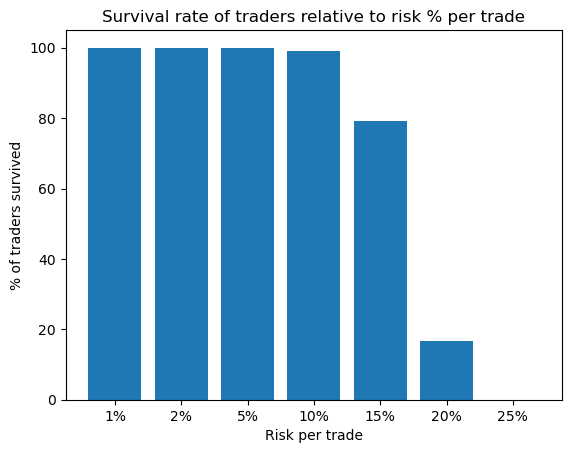

In [5]:
plt.figure()
plt.bar(
    x = [f'{i*100:.0f}%' for i in results.keys()],
    height =[round(i*100, 2) for i in results.values()] 
)
plt.title('Survival rate of traders relative to risk % per trade')
plt.xlabel('Risk per trade')
plt.ylabel('% of traders survived')
plt.show()

# Observation
### Even with a clearly positive expectancy, survival is not guaranteed. As risk per trade increases, the system exhibits a sharp, nonlinear transition from near-certain survival to rapid extinction. The edge remains unchanged, yet a small increase in leverage is sufficient to push many paths into irreversible collapse.

### The critical failure does not arise from poor accuracy or a loss of edge, but from exposure to large, compounded losses early in the path. At high risk levels, a short adverse sequence is enough to inflict catastrophic damage, terminating the account long before the statistical advantage can manifest. The account does not decay gradually — it is eliminated abruptly.

### This demonstrates that over-leveraging can destroy a winning system instantly. Position sizing operates as a hard survival constraint, not as a performance enhancement. Once sizing crosses a critical threshold, expectancy becomes irrelevant, and extinction becomes the dominant outcome.